In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('timetest.csv')
df.head()

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845


In [3]:
data=df['number_sold'].values.reshape(-1,1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

In [5]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
train_data.shape

(20440, 1)

In [7]:
train_X, train_y = [], []
for i in range(len(train_data) - 1):
    train_X.append(train_data[i])
    train_y.append(train_data[i + 1])
train_X = np.array(train_X)
train_y = np.array(train_y)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
model.fit(train_X, train_y, epochs=10, batch_size=1)

Epoch 1/10
20439/20439 [==============================] - 20s 921us/step - loss: 0.0028
Epoch 2/10
20439/20439 [==============================] - 20s 961us/step - loss: 5.0993e-04
Epoch 3/10
20439/20439 [==============================] - 20s 956us/step - loss: 5.0531e-04
Epoch 4/10
20439/20439 [==============================] - 20s 984us/step - loss: 5.0390e-04
Epoch 5/10
20439/20439 [==============================] - 26s 1ms/step - loss: 5.0461e-04
Epoch 6/10
20439/20439 [==============================] - 22s 1ms/step - loss: 5.0060e-04
Epoch 7/10
20439/20439 [==============================] - 22s 1ms/step - loss: 5.0333e-04
Epoch 8/10
20439/20439 [==============================] - 20s 991us/step - loss: 4.9867e-04
Epoch 9/10
20439/20439 [==============================] - 20s 997us/step - loss: 5.0160e-04
Epoch 10/10
20439/20439 [==============================] - 20s 987us/step - loss: 4.9984e-04


In [14]:
test_X, test_y = [], []
for i in range(len(test_data) - 1):
    test_X.append(test_data[i])
    test_y.append(test_data[i + 1])
test_X = np.array(test_X)
test_y = np.array(test_y)
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [15]:
prediction = model.predict(test_X)

160/160 [==============================] - 0s 668us/step


In [17]:
predictions = scaler.inverse_transform(prediction)
test_y = scaler.inverse_transform(test_y)
rmse = np.sqrt(np.mean((predictions - test_y) ** 2))
print(f'RMSE: {rmse}')

RMSE: 16.564837030451802


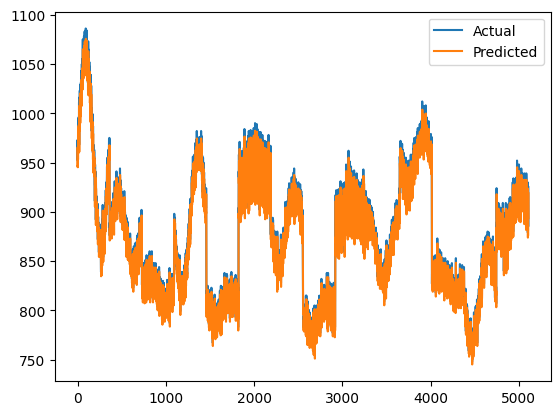

In [18]:
import matplotlib.pyplot as plt
plt.plot(test_y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [19]:
mape = np.mean(np.abs((test_y - predictions) / test_y)) * 100

print(f'MAPE: {mape}%')

MAPE: 1.4758462814387059%
